<a href="https://colab.research.google.com/github/ShaheerShaik24/Assignment-1/blob/main/Sentiment_Analysis_of_ResturantReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required Libraries

In [1]:
#connecting Google drive with Google colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Importing essential Libraries
import numpy as np #linear algebra
import pandas as pd # data pre processing , csv file I/O (eg. pd.read_csv)

# Exploratory Data Analysis

# Load and Prepare Data

In [3]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Restaurant_Reviews.tsv' , delimiter='\t', quoting=3 )

In [4]:
#shape = tuple of arry dimension (row , column)
data.shape

(1000, 2)

In [5]:
#returns the label of each column in the Dataframe
data.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
#view the data
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Data Preprocessing

In [7]:
#Importng esssential libraries for  performing Natural Language processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
#cleaning the data
corpus = []
for i in range(0,1000):  #1000 records
  #cleaning special characer from the reviews
  #The re.sub() meethod performs global search and replace on the given string.
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['Review'][i])

  #converting the entire review into lower case
  reviw = review.lower()

  #Tokenizing the review by words
  review_words = review.split()

  #Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  #Stemming the words
  ps =  PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  #Joining the stemmed words
  review = ' '.join(review)

  #Creating a Corpus
  corpus.append(review)





In [9]:
corpus[:1500]

['wow love place',
 'crust good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'the select menu great price',
 'now i get angri i want damn pho',
 'honeslti tast that fresh',
 'the potato like rubber could tell made ahead time kept warmer',
 'the fri great',
 'a great touch',
 'servic prompt',
 'would go back',
 'the cashier care ever i say still end wayyy overpr',
 'i tri cape cod ravoli chicken cranberri mmmm',
 'i disgust i pretti sure human hair',
 'i shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'thi place worth time let alon vega',
 'like',
 'the burritto blah',
 'the food amaz',
 'servic also cute',
 'i could care less the interior beauti',
 'so perform',
 'that right red velvet cake ohhh stuff good',
 'they never brought salad ask',
 'thi hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm our sever run around like total overwhelm',
 'the worst salmon sashimi

In [10]:
#creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer #CountVectorizer is a method to convert text to numerical data
cv = CountVectorizer(max_features=1500)    #max_features=1500
x = cv.fit_transform(corpus).toarray()
y = data.iloc[: , 1].values

# Split Data -(1000,1500)
.In this step , we are going to split data in two parts (training and testing) , so that we can train our model on training dataset & test its accuracy on unseen test data

In [11]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split #use to split the original data into training data & test data
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.20 , random_state = 0)

#randomm_state simply sets seed to the random generator , so that your train test splits are always deterministic, If you dont set seed, It is different each time.

#Training(1000, 15000)
#1000*80/100=800
#1000*20/100=200

In [ ]:
x_train.shape, x_test.shape , y_train.shape , y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

Take Away points:

> usually we takke more and more data in training so its easy for the moodell to llearn with more data



# Model Training

As we have done with preprocessing part , it is time to train our model . I am going to train model.
>**Multinomial Navies Bayes** - The algorith is a probabilitistic learning method that is mostly used in NLP.The algorithm is based on the Bayes theorem and predicts the tag of a text such as a peice of emial or newspaper article.

In [ ]:
#Fitting Navie Bayes to the training set
from sklearn.naive_bayes import MultinomialNB
#The Multinomial Naive Bayes Classifier is suitable for classification with discrete features(e.g , word counts for text classification)
classifier = MultinomialNB()
classifier.fit(x_train, y_train) #fit training data




MultinomialNB()

In [ ]:
#Predicting the Test set resullts
y_pred =classifier.predict(x_test)

y_pred


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1])

In [ ]:
#Accuracy , Precession and Recall

from sklearn.metrics import accuracy_score
#in python , the accuracy_score function of the sklearn.metrics pacakage calucullates the accuracy score for a set of predicted llabels against tthe true labels.
from sklearn.metrics import precision_score

from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("-----Scores-----")
print("Accuracy Score is: {}%".format(round(score1*100,2)))
print("Precision  Score is: {}%".format(round(score2*100,2)))
print("Recall Score is: {}%".format(round(score3*100,2)))


-----Scores-----
Accuracy Score is: 74.5%
Precision  Score is: 73.64%
Recall Score is: 78.64%


In [ ]:
#Making the confusion matrix
#A confusion matrix is a table that is used to define the perfomance of a classification algorithm. A confusion matrix visualizes and summarizes the perfomances of a classification

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)

In [ ]:
cm

array([[68, 29],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

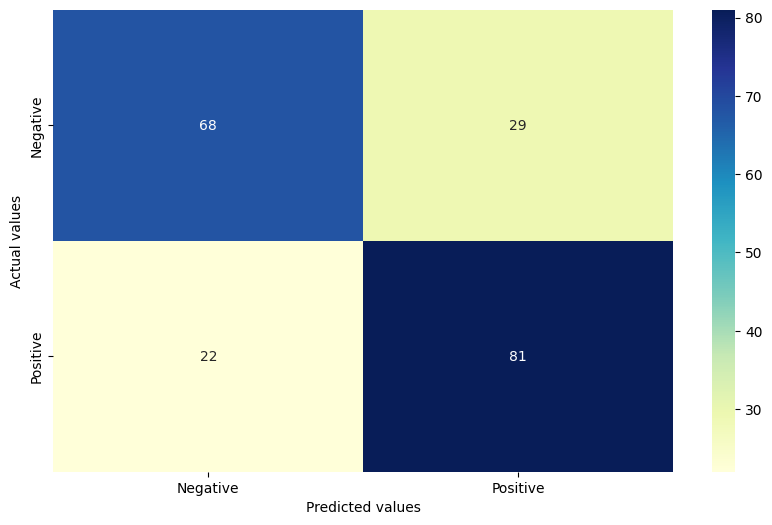

In [ ]:
from ast import increment_lineno
#plotting the confuion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm , annot=True, cmap="YlGnBu" , xticklabels=['Negative' ,'Positive'],  yticklabels=['Negative' ,'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')


In [ ]:
#Hyperparameter tuning tthe Navie Baayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(x_train , y_train)
  temp_y_pred = temp_classifier.predict(x_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
  print('------------------------------------')
  print("The best accuracy is {}% withalpha value as {}".format(round(best_accuracy*100,2), round(alpha_val,1)))


Accuracy score for alpha=0.1 is: 76.0%
------------------------------------
The best accuracy is 76.0% withalpha value as 0.1
Accuracy score for alpha=0.2 is: 77.0%
------------------------------------
The best accuracy is 77.0% withalpha value as 0.2
Accuracy score for alpha=0.3 is: 76.5%
------------------------------------
The best accuracy is 77.0% withalpha value as 0.2
Accuracy score for alpha=0.4 is: 76.5%
------------------------------------
The best accuracy is 77.0% withalpha value as 0.2
Accuracy score for alpha=0.5 is: 75.5%
------------------------------------
The best accuracy is 77.0% withalpha value as 0.2
Accuracy score for alpha=0.6 is: 75.5%
------------------------------------
The best accuracy is 77.0% withalpha value as 0.2
Accuracy score for alpha=0.7 is: 75.0%
------------------------------------
The best accuracy is 77.0% withalpha value as 0.2
Accuracy score for alpha=0.8 is: 75.5%
------------------------------------
The best accuracy is 77.0% withalpha value

In [ ]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(x_train,y_train)


MultinomialNB(alpha=0.2)

# Predictions

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ' , string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_rview_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
#Predicting values
sample_review = 'service is super.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is a NEGATIVE review!')


This is a POSITIVE review


In [ ]:
#Predicting values
sample_review = 'waste management.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is a NEGATIVE review!')


This is a NEGATIVE review!


In [ ]:
#Predicting values
sample_review = 'Foods taste is very Bad.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is a NEGATIVE review!')


This is a NEGATIVE review!
